In [ ]:
from IPython.display import clear_output

In [ ]:
# Download the required libraries (needed when running outside colab where the environment doesn't come pre-loaded with libraries)

%pip install torch
%pip install matplotlib
%pip install scikit-learn

clear_output()

In [ ]:
import torch
import torch.nn as nn
from torch.optim import SGD

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Contents:

1. Implementation of Logistic Regression using Pytorch to make a classifier for Breat Cancer Dataset

You need to know:

1. **pytorch** (for impelementation)
2. a little bit of **matplotlib** (for visualization)

## Loading Data

In [ ]:
data = load_breast_cancer()

In [ ]:
print(data.DESCR)  # description of dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
print('feature_names:', data.feature_names)
print('-'*20)
print('target_names:', data.target_names)

feature_names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
--------------------
target_names: ['malignant' 'benign']


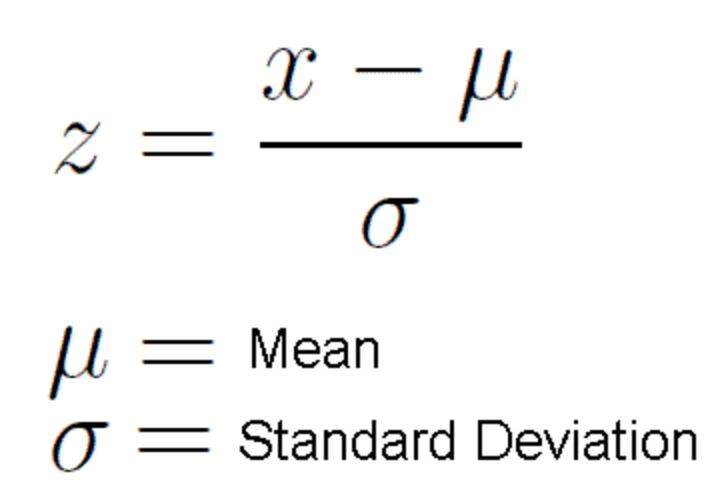

In [ ]:
# Load the Breast Cancer dataset

X = data.data
y = data.target

# Split the dataset into training and testing sets
#TODO

# Standardize the data
scaler = #TODO
X_train = scaler.fit_transform(#TODO)
X_test = scaler.transform(#TODO)

X_train = torch.tensor(#TODO, dtype=torch.float32)
X_test  = torch.tensor(#TODO, dtype=torch.float32)
y_train = torch.tensor(#TODO, dtype=torch.float32)
y_test  = torch.tensor(#TODO, dtype=torch.float32)

In [ ]:
print(f'{X.shape=}')
print(f'{y.shape=}')
print('-'*10)
print(f'{X_train.shape=}')
print(f'{X_test.shape=}')
print('-'*10)
print(f'{y_train.shape=}')
print(f'{y_test.shape=}')

X.shape=(569, 30)
y.shape=(569,)
----------
X_train.shape=torch.Size([455, 30])
X_test.shape=torch.Size([114, 30])
----------
y_train.shape=torch.Size([455])
y_test.shape=torch.Size([114])


In [ ]:
# Torch module based model for logistic_regression
class LogisticRegression(nn.Module):
  def __init__(self, input_dim):
    super(LogisticRegression, self).__init__()
    self.linear1 = nn.Linear(#TODO, #TODO)

  def forward(self, x):
    y = #TODO
    z = #TODO  # a sigmoid over a linear layer output
    return z

In [ ]:
input_dim = #TODO
model = LogisticRegression(input_dim)

# Define loss function and optimizer
criterion = #TODO  # Binary Cross Entropy Loss (binary because 2 classes). Cross entropy function in torch is multi-class
optimizer = SGD(model.parameters(), lr=#TODO)

num_epochs = #TODO

## Training the model

In [ ]:
train_losses = []

for epoch in range(num_epochs):
  # Forward pass
  outputs = #TODO
  loss = criterion(outputs, y_train.unsqueeze(dim=-1))

  # Backward pass and optimization
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  train_losses.append(#TODO)

  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.2665
Epoch [200/1000], Loss: 0.1940
Epoch [300/1000], Loss: 0.1615
Epoch [400/1000], Loss: 0.1426
Epoch [500/1000], Loss: 0.1300
Epoch [600/1000], Loss: 0.1209
Epoch [700/1000], Loss: 0.1140
Epoch [800/1000], Loss: 0.1085
Epoch [900/1000], Loss: 0.1040
Epoch [1000/1000], Loss: 0.1002


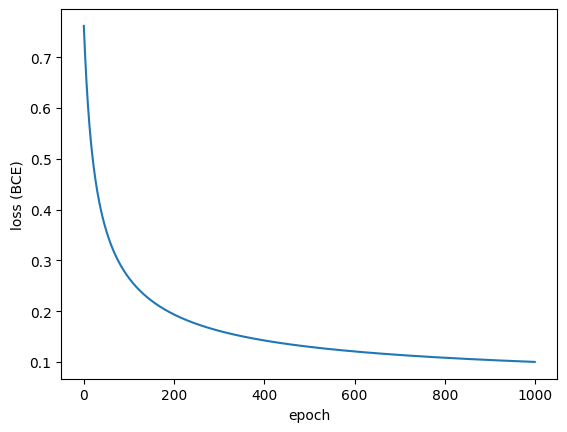

In [ ]:
plt.plot(#TODO)

plt.xlabel('epoch')
plt.ylabel('loss (BCE)')

plt.show()

In [ ]:
model.eval()
with torch.no_grad():

  y_pred = #TODO
  y_pred = (y_pred > 0.5).float()  # Convert probabilities to binary predictions (0 or 1)

  correct = (#TODO).sum().item()
  accuracy = correct / y_test.size(0)

  print(f'Accuracy on test set: {100 * accuracy:.2f}%')

Accuracy on test set: 96.49%
